In [18]:
import pandas as pd
# load the data
time_df_reviews = pd.read_csv('Dataset/RateBeer/reviews.csv')
time_df_beerAdvocate = pd.read_csv('Dataset/BeerAdvocate/reviews.csv')

In [19]:
# Create time column from the unix format for both dataset
time_df_reviews['time'] = pd.to_datetime(time_df_reviews['date'], origin='unix', unit='s')
time_df_reviews['year'] = time_df_reviews['time'].dt.year
time_df_reviews['month'] = time_df_reviews['time'].dt.month
time_df_reviews['day'] = time_df_reviews['time'].dt.day
time_df_beerAdvocate['time'] = pd.to_datetime(time_df_beerAdvocate['date'], origin='unix', unit='s')
time_df_beerAdvocate['year'] = time_df_beerAdvocate['time'].dt.year
time_df_beerAdvocate['month'] = time_df_beerAdvocate['time'].dt.month
time_df_beerAdvocate['day'] = time_df_beerAdvocate['time'].dt.day

In [20]:
# Data cleaning
time_df_reviews = time_df_reviews.dropna()
time_df_beerAdvocate = time_df_beerAdvocate.dropna()
# Remove the beer with less than 10 reviews
time_df_reviews = time_df_reviews.groupby('beer_id').filter(lambda x: len(x) > 10)
time_df_beerAdvocate = time_df_beerAdvocate.groupby('beer_id').filter(lambda x: len(x) > 10)

In [21]:
# Analysis using time and rating per beer style
time_df_reviews_style = time_df_reviews.copy()
# take randomly 10 samples of style
time_df_reviews_style = time_df_reviews_style[time_df_reviews_style['style'].isin(time_df_reviews_style['style'].sample(10))]
time_df_reviews_style = time_df_reviews_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

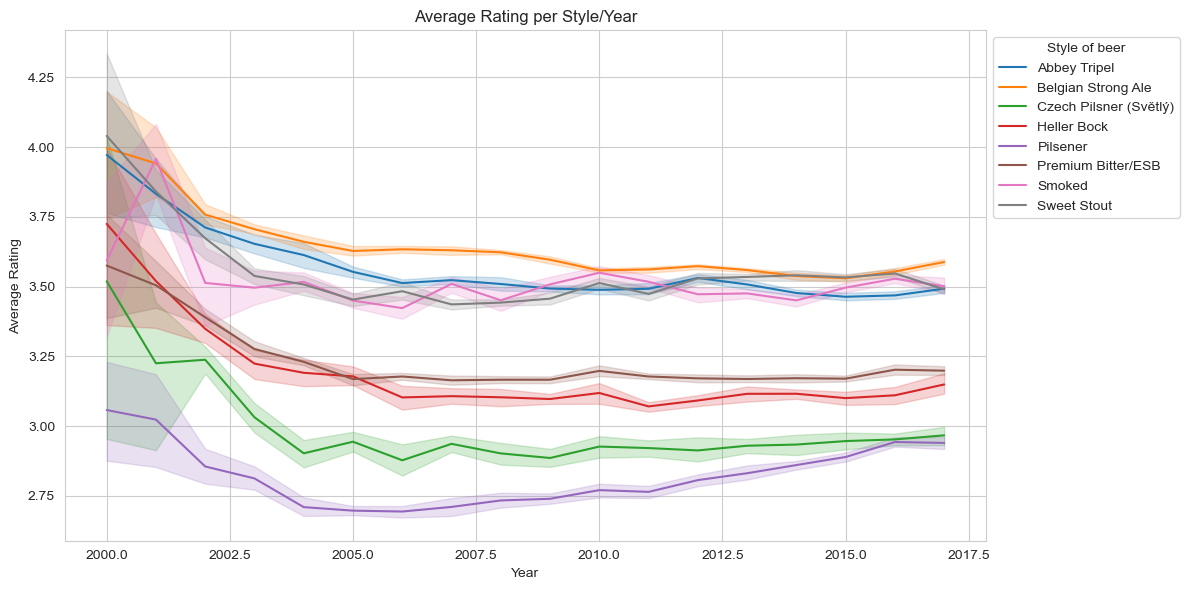

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_reviews_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

In [28]:
import statsmodels.formula.api as smf

time_df_reviews_cat = time_df_reviews.copy()
# Compute the mean of all rating to see which column affect the rating around the mean
mean = time_df_reviews_cat['rating'].mean()
time_df_reviews_cat['binary_rating'] = (time_df_reviews_cat['rating'] >= mean).astype(int)

# Check which columns will impact the most the rating
log = smf.logit(formula='binary_rating ~ year + month + day', data=time_df_reviews_cat)
log = log.fit()
print(log.summary())

Optimization terminated successfully.
         Current function value: 0.668482
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              6117679
Model:                          Logit   Df Residuals:                  6117675
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                0.008102
Time:                        23:20:09   Log-Likelihood:            -4.0896e+06
converged:                       True   LL-Null:                   -4.1230e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.0059      0.431   -255.329      0.000    -110.850    -109.162
year           0.0549      0.

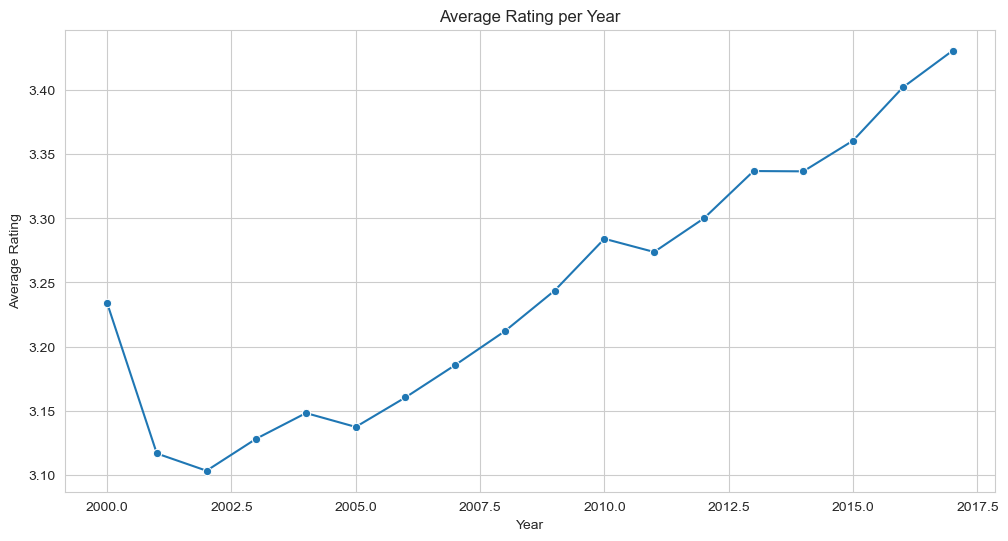

In [24]:
# Compare the average rating per year for all beer for the RateBeer dataset
mean = time_df_reviews.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

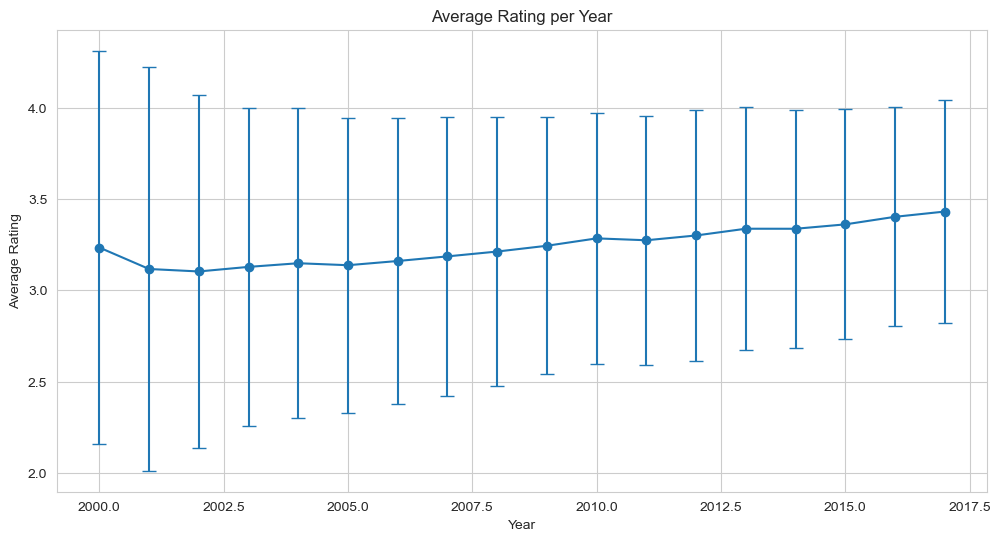

In [25]:
# Compare the average rating per year for all beer with std for the RateBeer dataset
mean = time_df_reviews.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_reviews.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

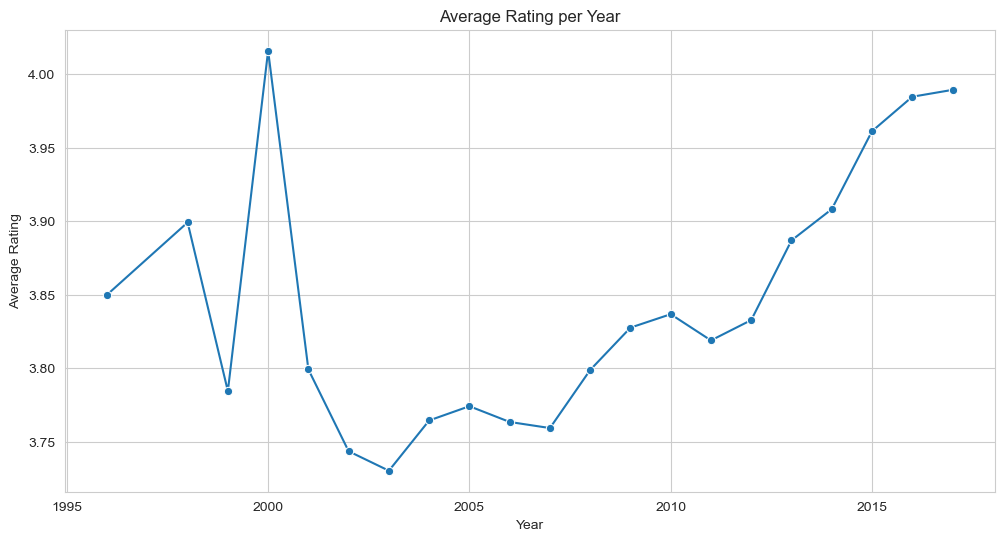

In [26]:
# Compare the average rating per year for all beer for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

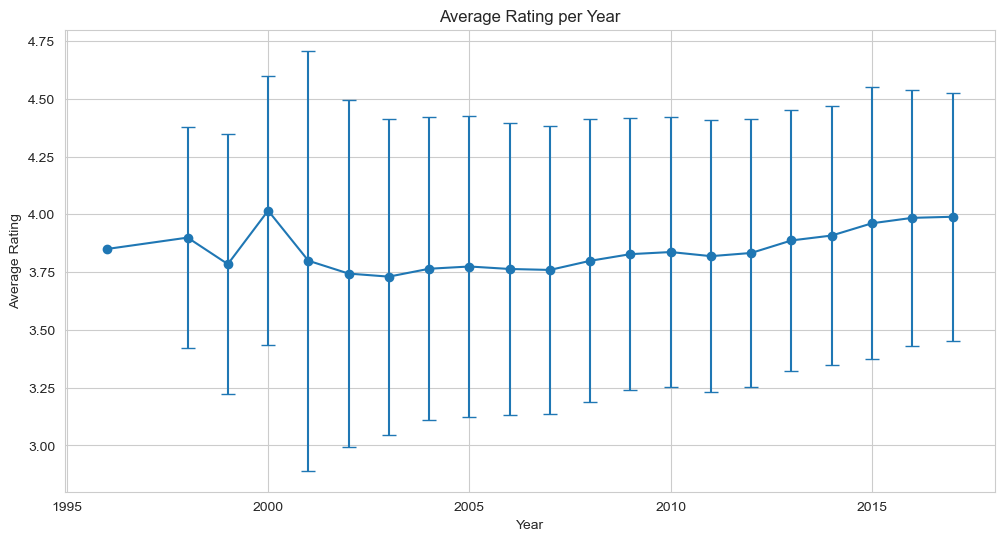

In [27]:
# Compare the average rating per year for all beer with std for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_beerAdvocate.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()